In [ ]:
# === SSC bootstrap cell (no borrar) ===
import os, sys, pathlib
BASE = "/content/drive/MyDrive/SSC"
os.environ["SSC_ROOT"] = BASE
os.environ["SSC_CACHE_DIR"] = f"{BASE}/.ssc_cache"
pathlib.Path(os.environ["SSC_CACHE_DIR"]).mkdir(parents=True, exist_ok=True)
sys.path.insert(0, BASE)

from ssc_pipeline.ssc_pipeline import run as ssc_update
ssc_update()  # refresca /content/drive/MyDrive/SSC/main.csv

import pandas as pd
df = pd.read_csv(f"{BASE}/main.csv")
print("main.csv cargado desde:", f"{BASE}/main.csv", "| Filas:", len(df))
df.head(3)


# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy.stats import norm
import ipywidgets as widgets
from ipywidgets import interact

import os
import time

from google.colab import drive

# Import Data

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path inside Google Drive
base_dir = "/content/drive/My Drive/Winter Quarter 2025/STA 141C - Final Project/"
data_dir = base_dir + "Data/"

Mounted at /content/drive


In [5]:
main_df = pd.read_csv(data_dir + "main.csv")
main_df

,Product Group,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),AHS Weighted Average (%),...,MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand),Country,Year
0,All Products,16184679.30,1.000129e+08,100.00,100.00,1.00,16.55,7.15,4.24,4.11,...,30.50,2.04,8.06,350.00,0.0,1501148.82,62928834.48,43538381.04,China,2000
1,Capital goods,8304745.38,2.613660e+07,51.31,26.13,1.27,15.75,6.70,1.48,0.79,...,54.80,0.27,0.60,25.00,0.0,19163.62,10335499.23,17008951.99,China,2000
2,Consumer goods,1325146.86,6.414185e+07,8.19,64.13,0.73,22.41,10.64,5.29,5.55,...,22.77,3.81,9.40,247.47,0.0,943810.83,47858993.09,21810579.77,China,2000
3,Intermediate goods,3233539.85,7.023412e+06,19.98,7.02,0.74,11.13,-0.61,5.21,3.51,...,22.69,1.27,7.95,350.00,0.0,95138.13,3909747.78,3815256.07,China,2000
4,Raw materials,2483821.28,1.574956e+06,15.35,1.57,1.04,42.98,30.99,1.91,1.25,...,54.35,0.99,22.33,350.00,0.0,443036.24,824594.38,903593.21,China,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,Stone and Glass,2682233.32,9.364003e+06,0.83,2.04,0.87,7.56,5.90,0.00,0.00,...,33.72,0.00,1.45,38.00,0.0,0.00,7543711.97,1452397.26,Mexico,2022
2411,Textiles and Clothing,6424058.89,5.680268e+06,1.98,1.24,0.60,10.06,3.87,0.00,0.00,...,12.56,0.00,4.11,32.00,0.0,0.00,5331392.26,144592.42,Mexico,2022
2412,Transportation,24459899.41,1.139018e+08,7.54,24.81,1.02,11.06,8.73,0.00,0.00,...,46.08,0.00,0.00,25.00,0.0,0.00,93808285.22,3814814.58,Mexico,2022
2413,Vegetable,14308950.99,2.104386e+07,4.41,4.58,1.53,7.20,4.33,0.00,0.00,...,23.76,0.00,41.68,131.80,0.0,0.00,19054722.73,1486948.45,Mexico,2022


In [6]:
impexp_dir = os.path.join(data_dir, "USImpExp")
impexp_data = {}

for year in range(2000, 2023):
  impexp_data[year] = pd.read_csv(os.path.join(impexp_dir, f"{year}.csv"))
  print(f"Successfully loaded data for {year}.")

Successfully loaded data for 2000.
Successfully loaded data for 2001.
Successfully loaded data for 2002.
Successfully loaded data for 2003.
Successfully loaded data for 2004.
Successfully loaded data for 2005.
Successfully loaded data for 2006.
Successfully loaded data for 2007.
Successfully loaded data for 2008.
Successfully loaded data for 2009.
Successfully loaded data for 2010.
Successfully loaded data for 2011.
Successfully loaded data for 2012.
Successfully loaded data for 2013.
Successfully loaded data for 2014.
Successfully loaded data for 2015.
Successfully loaded data for 2016.
Successfully loaded data for 2017.
Successfully loaded data for 2018.
Successfully loaded data for 2019.
Successfully loaded data for 2020.
Successfully loaded data for 2021.
Successfully loaded data for 2022.


In [7]:
# Combine all yearly dataframes into one, adding a 'Year' column
all_data = []
for year, df in impexp_data.items():
    df_copy = df.copy()
    df_copy['Year'] = int(year)
    all_data.append(df_copy)

combined_df = pd.concat(all_data, ignore_index=True)
combined_df

,Partner Name,No Of exported HS6 digit Products,No Of imported HS6 digit Products,Export Share in Total Products (%),Import Share in Total Products (%),Trade Balance (US$ Thousand),Export (US$ Thousand),Import (US$ Thousand),Import Partner Share (%),Export Partner Share (%),...,MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand),No Of Tariff Agreement,Year
0,Afghanistan,58.0,18.0,1.18,0.37,7.373490e+03,8154.38,7.808900e+02,0.00,0.00,...,30.00,0.00,10.00,20.20,0.0,0.00,104.58,756.03,1.0,2000
1,Albania,148.0,27.0,3.01,0.55,1.317605e+04,20943.32,7.767280e+03,0.00,0.00,...,30.34,0.00,11.24,350.00,0.0,0.00,5932.10,935.33,1.0,2000
2,Algeria,481.0,28.0,9.79,0.57,-1.862457e+06,861813.40,2.724270e+06,0.22,0.11,...,28.13,15.63,15.63,32.49,0.0,2531437.01,2563747.25,313433.51,NaN,2000
3,Andorra,106.0,19.0,2.16,0.39,9.843930e+03,10187.75,3.438200e+02,0.00,0.00,...,38.60,14.04,3.51,28.00,0.0,0.88,17.06,276.60,NaN,2000
4,Angola,571.0,21.0,11.63,0.43,-3.329989e+06,225296.80,3.555286e+06,0.29,0.03,...,68.12,14.49,1.45,32.49,0.0,3744501.03,3744713.59,8525.60,2.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Vietnam,2434.0,2245.0,54.04,49.76,-1.244784e+08,11398113.40,1.358765e+08,4.03,0.55,...,38.60,0.02,7.26,262.43,0.0,1816.50,51654062.48,58757968.61,NaN,2022
5080,Wallis and Futura Isl.,4.0,6.0,0.09,0.13,-3.020000e+01,86.25,1.164500e+02,0.00,0.00,...,66.67,0.00,0.00,7.90,0.0,0.00,18.53,93.20,1.0,2022
5081,Yemen,240.0,107.0,5.33,2.37,3.500625e+05,381998.17,3.193562e+04,0.00,0.02,...,28.48,0.00,11.82,29.80,0.0,0.00,15193.48,16117.45,2.0,2022
5082,Zambia,384.0,65.0,8.53,1.44,-3.587270e+03,135314.87,1.389021e+05,0.00,0.01,...,37.08,0.00,4.17,350.00,0.0,0.00,40572.08,95452.10,3.0,2022


# Tariff Impact Regression Analysis

In [8]:
import pandas as pd
import statsmodels.api as sm

# Select the relevant columns for the regression.
# Here, we use the following columns:
# - Dependent variable: 'Import (US$ Thousand)'
# - Independent variables:
#    'MFN Duty Free Tariff Lines Share (%)',
#    'MFN Dutiable Tariff Lines Share (%)',
#    'MFN AVE Tariff Lines Share (%)',
#    'MFN MaxRate (%)',
#    'World Growth (%)',
#    'Country Growth (%)'
cols = [
    'Import (US$ Thousand)',
    'MFN Duty Free Tariff Lines Share (%)',
    'MFN Dutiable Tariff Lines Share (%)',
    'MFN AVE Tariff Lines Share (%)',
    'MFN MaxRate (%)',
    'World Growth (%)',
    'Country Growth (%)'
]

# Filter the DataFrame to include only the selected columns and drop any rows with missing values
df_reg = main_df[cols].dropna()

# Define the dependent variable (y) and independent variables (X)
y = df_reg['Import (US$ Thousand)']
X = df_reg.drop('Import (US$ Thousand)', axis=1)

# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Import (US$ Thousand)   R-squared:                       0.120
Model:                               OLS   Adj. R-squared:                  0.118
Method:                    Least Squares   F-statistic:                     54.85
Date:                   Thu, 20 Mar 2025   Prob (F-statistic):           1.09e-63
Time:                           05:44:45   Log-Likelihood:                -46728.
No. Observations:                   2415   AIC:                         9.347e+04
Df Residuals:                       2408   BIC:                         9.351e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

These results suggest that, overall, the tariff‐related measures in our model explain only about 12% of the variation in U.S. import values (R² = 0.120). In other words, while the model is statistically significant overall (F-statistic p-value ≈ 1.09e-63), many of the individual predictors do not reach conventional levels of significance. Here are some key points from the output:

1. **Model Fit:**  
   - **R-squared (0.120):** The independent variables explain about 12% of the variability in import values, implying that many other factors likely influence imports.  
   - **F-statistic:** The overall model is statistically significant, indicating that at least one predictor is related to the import values.

2. **Significant Predictors:**  
   - **MFN AVE Tariff Lines Share (%):**  
     - Coefficient: -809,900  
     - p-value: < 0.001  
     - Interpretation: A 1 percentage point increase in the average tariff lines share is associated with a decrease of about 810,000 US$ Thousand in imports, holding other factors constant. This is statistically significant and suggests a strong negative relationship.
   - **MFN MaxRate (%):**  
     - Coefficient: 62,220  
     - p-value: < 0.001  
     - Interpretation: A 1 percentage point increase in the maximum tariff rate is associated with an increase of about 62,220 US$ Thousand in imports. This positive relationship is statistically significant.

3. **Non-significant Predictors:**  
   - **MFN Duty Free Tariff Lines Share (%)** and **MFN Dutiable Tariff Lines Share (%)** have p-values of 0.093 and 0.238 respectively, suggesting that, within this model, their associations with import values are not statistically significant at the 5% level.
   - **World Growth (%)** and **Country Growth (%)** also do not show statistically significant effects, indicating that these growth measures, as specified, might not have a clear direct impact on import values in this model.

4. **Other Diagnostics:**  
   - **Constant:** The intercept is not statistically significant, which is common in models where the dependent variable is on a very different scale (here, millions in US$ Thousand).
   - **Residual Diagnostics:**  
     - The Durbin-Watson statistic of 1.573 hints at some positive autocorrelation, which might warrant further investigation.  
     - Omnibus and Jarque-Bera tests indicate non-normality of the residuals, suggesting that there might be outliers or other specification issues that could be explored further.

### Overall Interpretation

The significant negative coefficient for **MFN AVE Tariff Lines Share (%)** implies that, on average, higher proportions of tariff lines subject to average tariff rates are associated with lower import values. In contrast, the positive coefficient for **MFN MaxRate (%)** might reflect that higher maximum tariff rates are linked with increased imports—perhaps because higher tariffs may be applied to products with high domestic demand or other factors not captured here. However, the low R-squared suggests that the model is missing other key predictors that affect import values.

### Next Steps

- **Model Expansion:** Consider adding additional predictors (e.g., exchange rates, domestic economic indicators, industry-specific variables) that may better capture the variability in import values.
- **Diagnostic Checks:** Perform further residual analysis and consider transformations or robust regression techniques to address issues like non-normality and autocorrelation.
- **Subgroup Analyses:** It might be useful to segment the data (e.g., by product group or country) to see if the relationships differ across different contexts.

This regression provides a useful starting point for understanding how certain tariff measures correlate with import values, but it also points to the need for a more comprehensive model to capture the complexity of international trade.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Import (US$ Thousand)   No. Observations:                   23
Model:                    ARIMA(1, 1, 1)   Log Likelihood                -456.047
Date:                   Thu, 20 Mar 2025   AIC                            918.094
Time:                           05:44:46   BIC                            921.367
Sample:                       01-01-2000   HQIC                           918.865
                            - 01-01-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9755      0.291     -3.352      0.001      -1.546      -0.405
ma.L1          0.9587      0.376      2.550      0.011       0.222       1.695
sigma2      6.593e+16   2.37

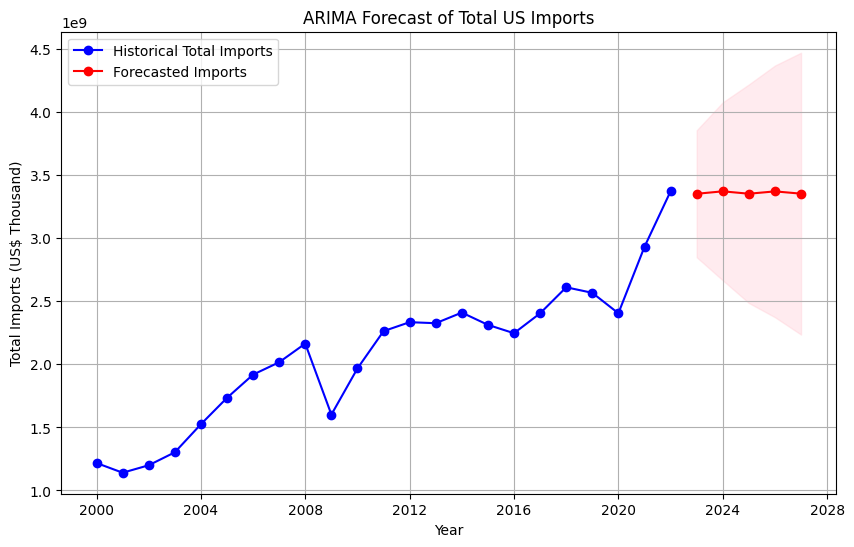

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# -----------------------------
# Prepare the Data: Combine all yearly dataframes
# -----------------------------
all_data = []
for year, df in impexp_data.items():
    df_copy = df.copy()
    df_copy['Year'] = int(year)
    all_data.append(df_copy)
combined_df = pd.concat(all_data, ignore_index=True)

# Aggregate total imports by year
total_import_by_year = combined_df.groupby('Year')['Import (US$ Thousand)'].sum()

# Convert the index to a datetime index (using January 1st for each year)
total_import_by_year.index = pd.to_datetime(total_import_by_year.index.astype(str) + '-01-01')

# -----------------------------
# Fit an ARIMA Model
# -----------------------------
# Here we use an ARIMA(1,1,1) model for demonstration purposes.
model = ARIMA(total_import_by_year, order=(1, 1, 1))
model_fit = model.fit()

# Print a summary of the model fit
print(model_fit.summary())

# -----------------------------
# Forecast Future Values
# -----------------------------
forecast_steps = 5  # Forecast the next 5 years
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# -----------------------------
# Plot Historical Data and Forecast
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(total_import_by_year, label='Historical Total Imports', marker='o', color='blue')
plt.plot(forecast_values, label='Forecasted Imports', marker='o', color='red')
plt.fill_between(forecast_values.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Total Imports (US$ Thousand)')
plt.title('ARIMA Forecast of Total US Imports')
plt.legend()
plt.grid(True)
plt.show()


It’s not necessarily “wrong,” but it’s a very **simplistic** forecast given the complexity of real-world trade data. ARIMA models rely purely on past values (and, in this example, only a single univariate series) to predict future outcomes. As a result:

1. **No External Drivers:**  
   If there are major structural changes (e.g., shifts in tariff policy, global recessions, COVID-19 disruptions) that drastically alter trade patterns, a basic ARIMA(1,1,1) won’t capture them. Including exogenous variables (e.g., tariff rates, GDP, or other macro indicators) via an ARIMAX or a more advanced model can often yield more realistic forecasts.

2. **Stationarity & Transformations:**  
   Trade data can grow over time due to population growth, inflation, etc. Sometimes, a log transformation or additional differencing is needed to make the series more stationary. If the series is non-stationary or exhibits strong trends, the ARIMA forecast may “flatten” or behave oddly.

3. **Model Order Selection:**  
   ARIMA(1,1,1) was just a quick example. It’s often better to do:
   - **Automated model selection** (e.g., using `pmdarima.auto_arima` in Python).
   - **Diagnostic checks** (ACF/PACF plots, stationarity tests like the Augmented Dickey-Fuller) to guide the best (p,d,q).

4. **Recent Volatility or Shocks:**  
   If there’s a sudden spike or drop near the end of the historical data (e.g., around 2020–2021 due to global events), the model might interpret that in ways that produce seemingly flat or conservative forecasts.

5. **Data Frequency and Volume:**  
   Annual data has limited points for time series. More frequent data (e.g., monthly or quarterly) can sometimes produce more nuanced forecasts.

---

### How to Improve the Forecast

- **Check Stationarity:** Ensure the time series is stationary (e.g., use log transforms or additional differencing).
- **Incorporate Exogenous Variables (ARIMAX / SARIMAX):** Include macroeconomic factors, tariff rates, or leading indicators to better reflect real-world drivers.
- **Model Selection & Diagnostics:** Use tools like `auto_arima` or manually inspect ACF/PACF to find an optimal model order.
- **Include More Data Points:** If available, use monthly or quarterly data for more accurate model fitting and clearer patterns.

---

### Conclusion

The current forecast isn’t necessarily “wrong” for a simple ARIMA model—it’s just limited by its assumptions and data. For a policy-driven, structurally shifting series like U.S. trade, a more advanced approach or additional variables is typically required to produce forecasts that better align with economic realities.

# Time-Series Simulation

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

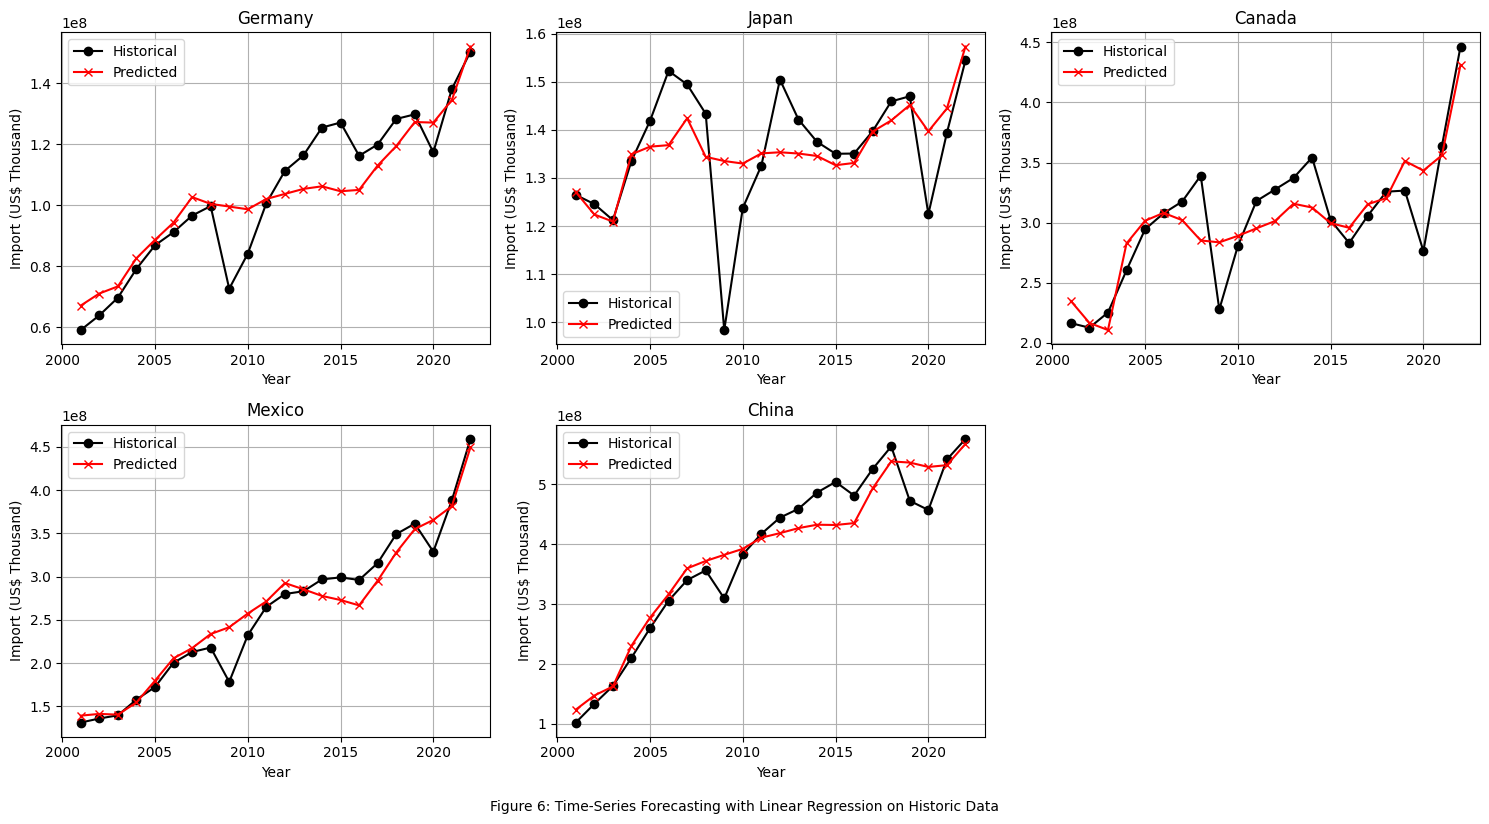

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -----------------------------
# Parameters
# -----------------------------
top5_countries = ["Germany", "Japan", "Canada", "Mexico", "China"]

# Columns we want to use as predictors (plus 'Lag Import' if desired)
tariff_predictors = [
    "MFN MaxRate (%)",
    "MFN MinRate (%)",
    "MFN Duty Free Tariff Lines Share (%)",
    "MFN Specific Tariff Lines Share (%)",
    "MFN AVE Tariff Lines Share (%)"
]
use_lag_import = True  # Set to False if you do not want to include a lag predictor

# -----------------------------
# Load Data
# -----------------------------

# Filter to "All Products" only (if desired)
all_products_df = main_df[main_df["Product Group"] == "All Products"].copy()

# Create subplots for 5 countries (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=False)
axes = axes.flatten()

# We'll only need 5 subplots; the 6th can remain empty or be turned off
for i, country in enumerate(top5_countries):
    ax = axes[i]

    # -----------------------------
    # Subset for this country
    # -----------------------------
    df_country = all_products_df[all_products_df["Country"] == country].copy()

    # Sort by year and drop rows with missing import values
    df_country = df_country.sort_values("Year").dropna(subset=["Import (US$ Thousand)"])

    # Optionally create a lagged import column
    if use_lag_import:
        df_country["Lag Import"] = df_country["Import (US$ Thousand)"].shift(1)
        df_country = df_country.dropna(subset=["Lag Import"])

    # Define the predictors list (add 'Lag Import' if using it)
    if use_lag_import:
        predictors = tariff_predictors + ["Lag Import"]
    else:
        predictors = tariff_predictors

    # Drop rows missing any predictor
    df_country = df_country.dropna(subset=predictors)

    # -----------------------------
    # Fit the Model
    # -----------------------------
    X = df_country[predictors]
    y = df_country["Import (US$ Thousand)"]

    if len(X) < 2:
        # Not enough data points to train a meaningful model
        ax.set_title(f"{country} (Insufficient Data)")
        continue

    model = LinearRegression()
    model.fit(X, y)

    # -----------------------------
    # In-Sample Simulation
    # -----------------------------
    # We'll predict year by year, recursively updating the lag
    years = df_country["Year"].values
    df_country = df_country.reset_index(drop=True)

    predicted_imports = []
    if use_lag_import:
        # Start with the actual lag from the first row
        current_lag = df_country.loc[0, "Lag Import"]
    else:
        current_lag = None  # Not used if no lag predictor

    for idx in range(len(df_country)):
        row = df_country.loc[idx].copy()

        # If using lag, override the row's 'Lag Import' with the 'current_lag'
        if use_lag_import:
            row["Lag Import"] = current_lag

        # Build the predictor vector
        X_row = row[predictors].values.reshape(1, -1)

        # Predict
        y_pred = model.predict(X_row)[0]
        predicted_imports.append(y_pred)

        # Update lag for next iteration
        if use_lag_import:
            current_lag = y_pred

    df_country["Predicted Import"] = predicted_imports

    # -----------------------------
    # Plot Historical vs. Predicted
    # -----------------------------
    ax.plot(df_country["Year"], df_country["Import (US$ Thousand)"],
            marker='o', color='black', label='Historical')
    ax.plot(df_country["Year"], df_country["Predicted Import"],
            marker='x', color='red', label='Predicted')
    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Import (US$ Thousand)")
    ax.grid(True)
    ax.legend()

# Hide the 6th subplot if you only have 5 countries
axes[-1].axis('off')
plt.figtext(0.5, -0.02, "Figure 6: Time-Series Forecasting with Linear Regression on Historic Data", ha='center')
plt.tight_layout()
plt.show()


=== Germany ===
  Best polynomial degree: 3

=== Japan ===
  Best polynomial degree: 2

=== China ===
  Best polynomial degree: 2

=== Canada ===
  Best polynomial degree: 2

=== Mexico ===
  Best polynomial degree: 2


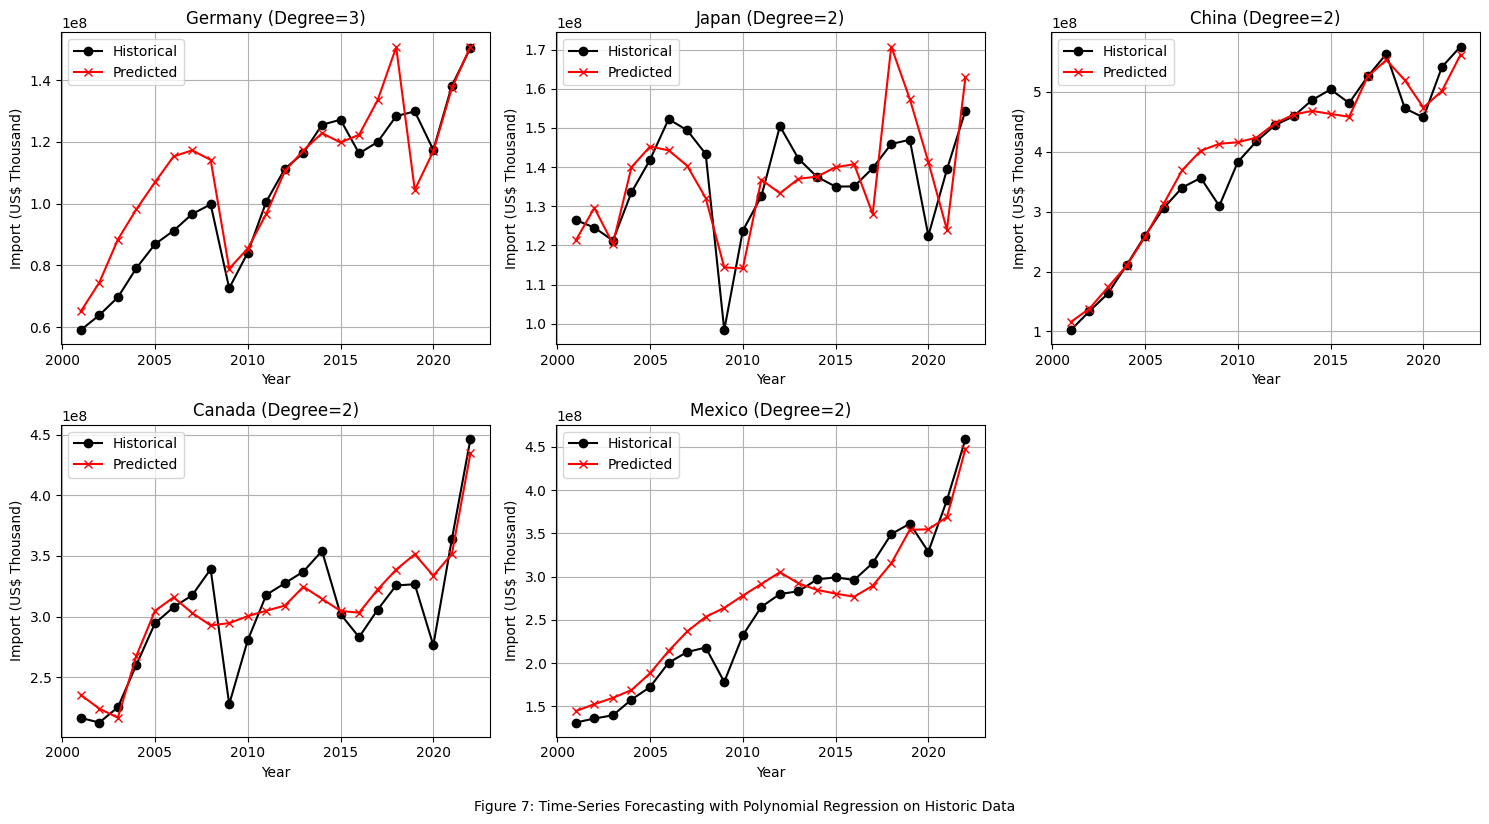

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline

country_models = []

# -----------------------------
# Helper Functions
# -----------------------------

def prepare_country_data(df, country, predictors, use_lag=True):
    """
    Filters the dataframe for a single country, sorts by year,
    and optionally creates a lagged import column.

    Parameters:
    -----------
    df : pd.DataFrame
        Main dataset containing 'Year', 'Import (US$ Thousand)', and tariff columns.
    country : str
        The partner country's name to filter.
    predictors : list of str
        Columns to be used as predictors (excluding 'Lag Import').
    use_lag : bool
        Whether to include a lagged import predictor.

    Returns:
    --------
    df_country : pd.DataFrame
        Processed dataframe for the given country.
    final_predictors : list of str
        Predictors used in the final model (including 'Lag Import' if requested).
    """
    # Filter data for the specified country
    df_country = df[df["Country"] == country].copy()

    # Sort by Year and drop missing import values
    df_country = df_country.sort_values("Year").dropna(subset=["Import (US$ Thousand)"])

    # Optionally create a lagged import column
    if use_lag:
        df_country["Lag Import"] = df_country["Import (US$ Thousand)"].shift(1)
        df_country = df_country.dropna(subset=["Lag Import"])
        final_predictors = predictors + ["Lag Import"]
    else:
        final_predictors = predictors

    # Drop rows missing any predictor
    df_country = df_country.dropna(subset=final_predictors)

    return df_country, final_predictors


def time_series_cv_train_poly(X, y, degree_options=None, n_splits=3):
    """
    Trains a LinearRegression model with PolynomialFeatures using
    time-series cross-validation and GridSearchCV over different polynomial degrees.

    Parameters:
    -----------
    X : pd.DataFrame
        Predictor matrix.
    y : pd.Series
        Target vector.
    degree_options : list of int
        Polynomial degrees to try (e.g., [1, 2, 3]).
    n_splits : int
        Number of splits for time-series cross-validation.

    Returns:
    --------
    best_model : Pipeline
        The best pipeline (PolynomialFeatures + LinearRegression) found by GridSearchCV.
    best_degree : int
        The degree of the best polynomial transformation.
    """
    if degree_options is None:
        degree_options = [1, 2, 3]  # You can adjust as needed

    # Create a pipeline: PolynomialFeatures -> LinearRegression
    pipeline = Pipeline([
        ("poly", PolynomialFeatures(include_bias=False)),  # degree set via param_grid
        ("linreg", LinearRegression())
    ])

    # Time-series split
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Parameter grid for polynomial degree
    param_grid = {
        "poly__degree": degree_options
    }

    # Grid search
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=tscv
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_degree = grid_search.best_params_["poly__degree"]
    print(f"  Best polynomial degree: {best_degree}")
    return best_model, best_degree


def in_sample_simulation(df_country, model, predictors, use_lag=True):
    """
    Performs an in-sample simulation (recursive prediction) to compare
    predicted imports with historical data.

    During prediction, we create a 1-row DataFrame with the same columns
    as X had at training time, ensuring that PolynomialFeatures sees valid names.
    """
    df_country = df_country.reset_index(drop=True)

    predicted_imports = []

    # Initialize the lag with the actual first row's "Lag Import" if using lag
    if use_lag:
        current_lag = df_country.loc[0, "Lag Import"]
    else:
        current_lag = None

    for i in range(len(df_country)):
        row = df_country.loc[i].copy()

        # Overwrite 'Lag Import' with our predicted lag if using recursion
        if use_lag:
            row["Lag Import"] = current_lag

        # Build the predictor vector
        # Instead of converting to a NumPy array directly,
        # we create a DataFrame with the same columns in the same order.
        X_row_df = pd.DataFrame([row[predictors].values], columns=predictors)

        # Predict
        y_pred = model.predict(X_row_df)[0]
        predicted_imports.append(y_pred)

        # Update lag for the next iteration
        if use_lag:
            current_lag = y_pred

    df_country["Predicted Import"] = predicted_imports
    return df_country


def plot_country(ax, df_country, country):
    """
    Plots historical vs. predicted imports for a single country on a given axis.
    """
    ax.plot(df_country["Year"], df_country["Import (US$ Thousand)"],
            marker='o', color='black', label='Historical')
    ax.plot(df_country["Year"], df_country["Predicted Import"],
            marker='x', color='red', label='Predicted')
    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Import (US$ Thousand)")
    ax.grid(True)
    ax.legend()


# -----------------------------
# Main Workflow
# -----------------------------

country_models = {}

# Filter for "All Products" if you only want aggregated product data
all_products_df = main_df[main_df["Product Group"] == "All Products"].copy()

# Define your top 5 countries (example)
top5_countries = ["Germany", "Japan", "China", "Canada", "Mexico"]

# Columns we want to use as predictors (excluding lag for now)
tariff_predictors = [
    "MFN MaxRate (%)",
    "MFN MinRate (%)",
    "MFN Duty Free Tariff Lines Share (%)",
    "MFN Specific Tariff Lines Share (%)",
    "MFN AVE Tariff Lines Share (%)"
]
use_lag_import = True  # Decide if you want to include the lag feature

# Create subplots for 5 countries (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=False)
axes = axes.flatten()

for i, country in enumerate(top5_countries):
    ax = axes[i]

    print(f"\n=== {country} ===")
    # 1) Prepare the data
    df_country, final_predictors = prepare_country_data(
        all_products_df,
        country,
        tariff_predictors,
        use_lag=use_lag_import
    )

    # If there's not enough data to train, skip
    if len(df_country) < 2:
        ax.set_title(f"{country} (Insufficient Data)")
        ax.axis('off')
        continue

    # 2) Separate X, y
    X = df_country[final_predictors]
    y = df_country["Import (US$ Thousand)"]

    # 3) Train model with polynomial features + linear regression
    #    using time-series cross-validation
    best_model, best_degree = time_series_cv_train_poly(X, y, degree_options=[2, 3], n_splits=4)
    country_models[country] = best_model

    # 4) In-sample simulation
    df_country_sim = in_sample_simulation(df_country, best_model, final_predictors, use_lag=use_lag_import)

    # 5) Plot
    plot_country(ax, df_country_sim, country)
    ax.set_title(f"{country} (Degree={best_degree})")

# Hide the extra subplot
axes[-1].axis('off')
plt.figtext(0.5, -0.02, "Figure 7: Time-Series Forecasting with Polynomial Regression on Historic Data", ha='center')
plt.tight_layout()
plt.show()


# Simulation Forecast Predictions

In [12]:
new_tariff_scenario = {
    "China": {
        "MFN MaxRate (%)": 35,
        "MFN MinRate (%)": 5,
        "MFN Duty Free Tariff Lines Share (%)": 5,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 93
    },
    "Canada": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 10,
        "MFN Duty Free Tariff Lines Share (%)": 10,
        "MFN Specific Tariff Lines Share (%)": 3,
        "MFN AVE Tariff Lines Share (%)": 87
    },
    "Mexico": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 10,
        "MFN Specific Tariff Lines Share (%)": 3,
        "MFN AVE Tariff Lines Share (%)": 87
    },
    "Japan": {
        "MFN MaxRate (%)": 25,  # Proposed
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 20,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 78
    },
    "Germany": {
        "MFN MaxRate (%)": 25,  # Proposed
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 15,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 83
    }
}


In [13]:
def forecast_future_years(
    df_country,
    model,
    predictors,
    future_years=6,
    use_lag=True,
    scenario_rates=None
):
    """
    Forecast the next 'future_years' years beyond the last historical year
    using the given model (PolynomialFeatures + LinearRegression, or similar)
    and a recursive approach if a lagged import predictor is used.

    Parameters
    ----------
    df_country : pd.DataFrame
        Historical data for the specific country, already processed by
        in_sample_simulation so that the last row has a predicted import.
    model : trained estimator
        A pipeline or regression model with .predict().
    predictors : list of str
        The predictor column names (including 'Lag Import' if use_lag=True).
    future_years : int
        Number of future years to forecast.
    use_lag : bool
        If True, each future year's "Lag Import" is set to the last predicted import.
    scenario_rates : dict, optional
        A dictionary specifying new tariff values for future years. For example:
        {
            "MFN MaxRate (%)": 25,
            "MFN MinRate (%)": 10,
            ...
        }
        If provided, these values override the last row's corresponding columns
        for each forecasted year. If None, the last known tariff values remain constant.

    Returns
    -------
    df_forecast : pd.DataFrame
        DataFrame containing:
          - 'Year'
          - 'Predicted Import'
        for each forecasted future year.
    """
    # We'll base everything on the final row of df_country
    last_row = df_country.iloc[-1].copy()
    last_year = int(last_row["Year"])

    # Initialize the lag from the last predicted or actual import
    if use_lag and "Predicted Import" in df_country.columns:
        current_lag = df_country.iloc[-1]["Predicted Import"]
    elif use_lag:
        current_lag = df_country.iloc[-1]["Import (US$ Thousand)"]
    else:
        current_lag = None

    forecast_data = []

    # If we're using a lag, we remove 'Lag Import' from the last row's baseline
    # so we can set it explicitly each iteration.
    baseline_values = last_row[predictors].drop(labels="Lag Import", errors="ignore") \
        if use_lag else last_row[predictors]

    for i in range(1, future_years + 1):
        new_year = last_year + i

        # Copy the baseline predictor values
        future_row = baseline_values.copy()

        # Override with scenario rates if provided
        if scenario_rates is not None:
            for col_name, val in scenario_rates.items():
                if col_name in future_row.index:
                    future_row[col_name] = val

        # If using a lag, set it to the last predicted import
        if use_lag:
            future_row["Lag Import"] = current_lag

        # Build a 1-row DataFrame for prediction
        X_row_df = pd.DataFrame([future_row[predictors].values], columns=predictors)
        predicted_import = model.predict(X_row_df)[0]

        # Update the lag for the next iteration
        if use_lag:
            current_lag = predicted_import

        forecast_data.append({
            "Year": new_year,
            "Predicted Import": predicted_import
        })

    df_forecast = pd.DataFrame(forecast_data)
    return df_forecast

In [14]:
import_results = {}   # Dictionary to store import data for each country
future_years = 6

for country, model in country_models.items():
    # 1) Prepare the data & run in-sample simulation
    df_country, final_predictors = prepare_country_data(
        all_products_df,
        country,
        tariff_predictors,
        use_lag=use_lag_import
    )
    df_country_sim = in_sample_simulation(df_country, model, final_predictors, use_lag=use_lag_import)

    # 2) Retrieve scenario rates if available
    scenario_rates = new_tariff_scenario.get(country, None)

    # 3) Forecast future with the updated function
    df_forecast = forecast_future_years(
        df_country_sim,
        model,
        final_predictors,
        future_years=future_years,
        use_lag=use_lag_import,
        scenario_rates=scenario_rates
    )

    # 4) Store both the in-sample simulation and forecast in import_results
    import_results[country] = {
        "df_sim": df_country_sim,      # Historical data with 'Predicted Import'
        "df_forecast": df_forecast     # Future data with 'Predicted Import'
    }

    # 5) (Optional) Print the forecast for debugging or inspection
    print(f"\nImport Forecast for {country} under new tariffs, next {future_years} years:")
    print(df_forecast)



Import Forecast for Germany under new tariffs, next 6 years:
   Year  Predicted Import
0  2023      1.081177e+09
1  2024     -1.386804e+11
2  2025      4.756259e+17
3  2026     -1.913033e+37
4  2027      1.244781e+96
5  2028    -3.429297e+272

Import Forecast for Japan under new tariffs, next 6 years:
   Year  Predicted Import
0  2023     -1.744641e+09
1  2024      5.035041e+10
2  2025      2.026647e+13
3  2026      3.399077e+18
4  2027      9.562324e+28
5  2028      7.567780e+49

Import Forecast for China under new tariffs, next 6 years:
   Year  Predicted Import
0  2023      2.871614e+09
1  2024      3.989986e+09
2  2025     -1.744375e+09
3  2026     -1.567341e+10
4  2027     -4.978741e+11
5  2028     -4.088218e+14

Import Forecast for Canada under new tariffs, next 6 years:
   Year  Predicted Import
0  2023     -2.365187e+09
1  2024     -2.082766e+10
2  2025     -2.083093e+12
3  2026     -2.144415e+16
4  2027     -2.273180e+24
5  2028     -2.554369e+40

Import Forecast for Mexico u

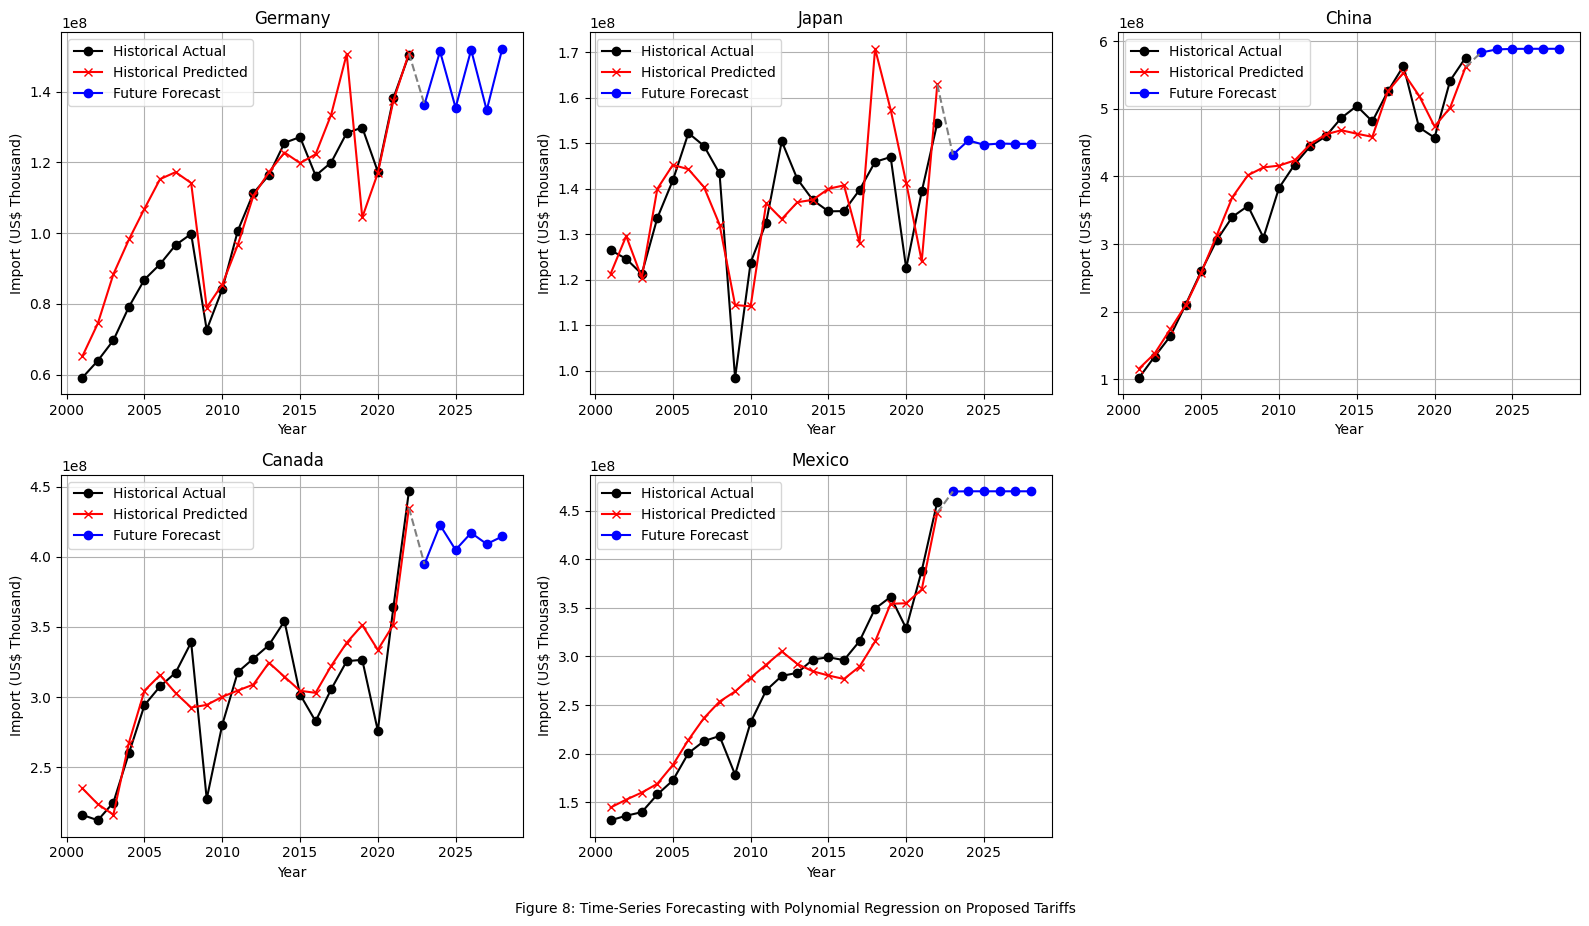

In [15]:
def plot_forecast(ax, df_country_sim, df_forecast, country):
    # Historical actual
    ax.plot(df_country_sim["Year"], df_country_sim["Import (US$ Thousand)"],
            marker='o', color='black', label='Historical Actual')

    # Historical predicted
    ax.plot(df_country_sim["Year"], df_country_sim["Predicted Import"],
            marker='x', color='red', label='Historical Predicted')

    # Future forecast
    if df_forecast is not None and len(df_forecast) > 0:
        ax.plot(df_forecast["Year"], df_forecast["Predicted Import"],
                marker='o', color='blue', label='Future Forecast')
        ax.plot([df_country_sim.iloc[-1]["Year"], df_forecast.iloc[0]["Year"]],
                [df_country_sim.iloc[-1]["Predicted Import"], df_forecast.iloc[0]["Predicted Import"]],
                linestyle='--', color='gray')

    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Import (US$ Thousand)")
    ax.grid(True)
    ax.legend()

# Example usage in a multi-plot setup
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for i, (country, model) in enumerate(country_models.items()):
    ax = axes[i]
    # Re-prepare and simulate
    df_country, final_predictors = prepare_country_data(
        all_products_df,
        country,
        tariff_predictors,
        use_lag=use_lag_import
    )
    df_country_sim = in_sample_simulation(df_country, model, final_predictors, use_lag=use_lag_import)
    df_forecast = forecast_future_years(df_country_sim, model, final_predictors, future_years=6, use_lag=use_lag_import, scenario_rates=new_tariff_scenario)

    plot_forecast(ax, df_country_sim, df_forecast, country)

# Hide extra subplot if you have only 5 countries
axes[-1].axis('off')
plt.figtext(0.5, -0.02, "Figure 8: Time-Series Forecasting with Polynomial Regression on Proposed Tariffs", ha='center')
plt.tight_layout()
plt.show()

# Simulating Retaliatory Tariffs

In [16]:
# Hypothetical retaliatory measures from each partner on U.S. exports
retaliatory_scenario = {
    "Canada": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 5,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 93
    },
    "Mexico": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 10,
        "MFN Specific Tariff Lines Share (%)": 5,
        "MFN AVE Tariff Lines Share (%)": 85
    },
    "China": {
        "MFN MaxRate (%)": 15,
        "MFN MinRate (%)": 5,
        "MFN Duty Free Tariff Lines Share (%)": 3,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 95
    },
    "Japan": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 15,
        "MFN Specific Tariff Lines Share (%)": 3,
        "MFN AVE Tariff Lines Share (%)": 82
    },
    "Germany": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 20,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 78
    }
}

# Define the columns we use as predictors (these are the partner's MFN columns)
# plus a potential 'Lag Export' if you want last year's export as a predictor.
export_predictors = [
    "MFN MaxRate (%)",
    "MFN MinRate (%)",
    "MFN Duty Free Tariff Lines Share (%)",
    "MFN Specific Tariff Lines Share (%)",
    "MFN AVE Tariff Lines Share (%)"
]
use_lag_export = True  # Decide if you want to include a lagged export predictor

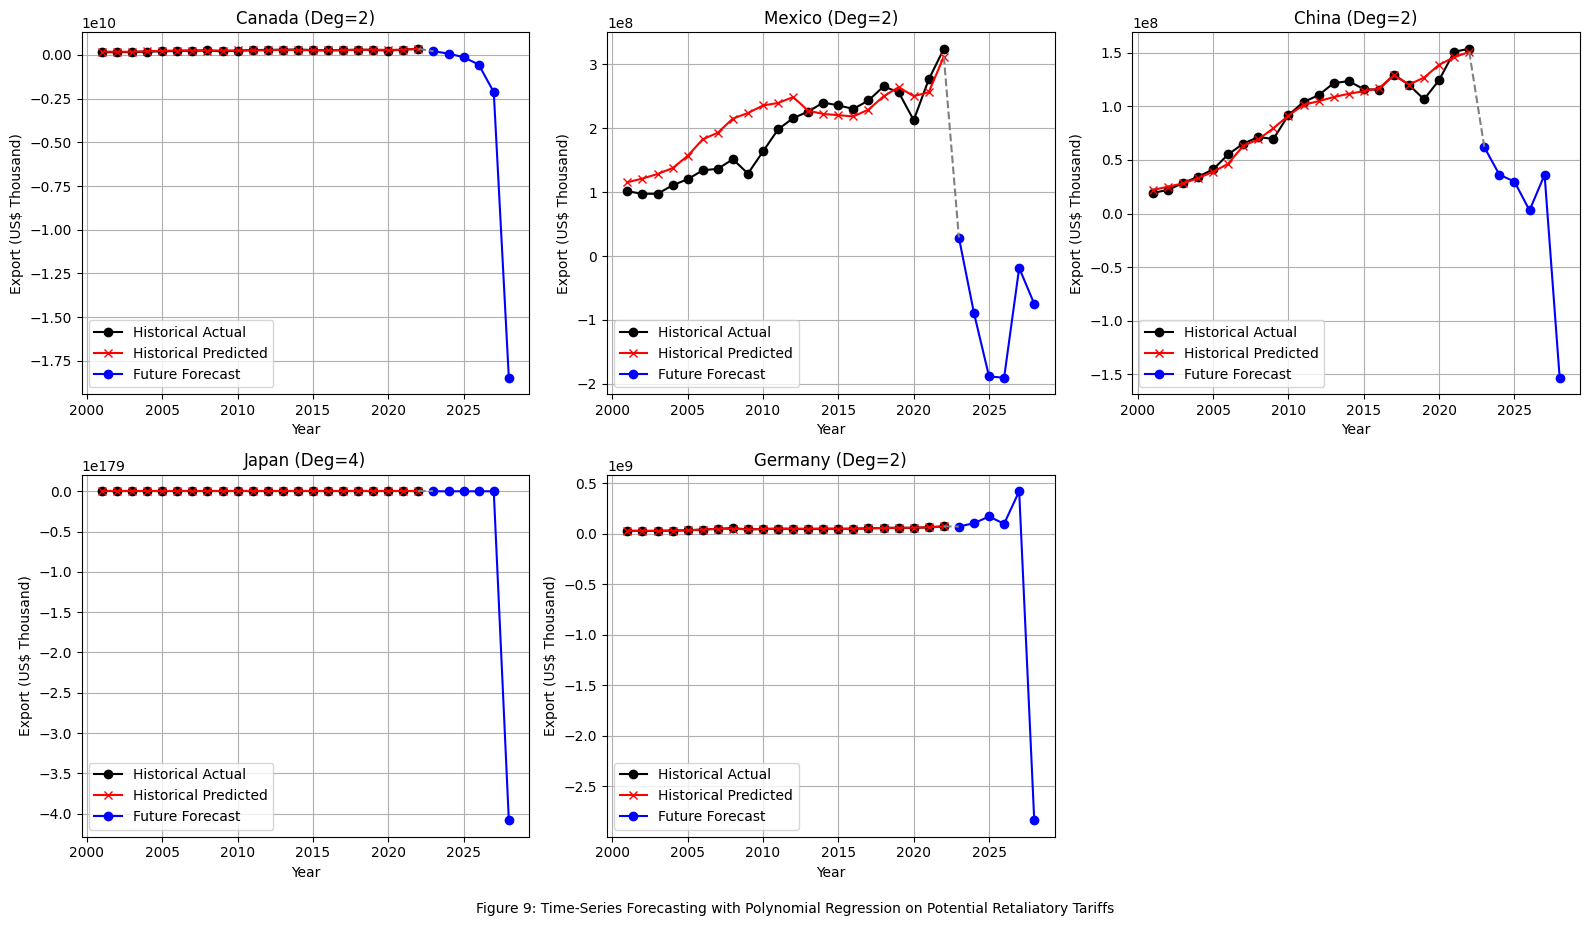

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline

# --------------------------------------------------------------------------
# 1) Load & Filter the Dataset
# --------------------------------------------------------------------------

# We'll assume 'main_df' is already loaded above, e.g.:
# main_df = pd.read_csv('/path/to/main.csv')

# Filter for "All Products" if you want an aggregate of all product groups
all_products_df = main_df[main_df["Product Group"] == "All Products"].copy()

# Top countries for which we'll model U.S. exports
top_countries = ["Canada", "Mexico", "China", "Japan", "Germany"]

# --------------------------------------------------------------------------
# 2) Helper Functions
# --------------------------------------------------------------------------

def prepare_country_data_for_exports(df, country, predictors, use_lag=True):
    df_country = df[df["Country"] == country].copy()

    # Sort by Year and drop missing export values
    df_country = df_country.sort_values("Year").dropna(subset=["Export (US$ Thousand)"])

    # Optionally create a lagged export column
    if use_lag:
        df_country["Lag Export"] = df_country["Export (US$ Thousand)"].shift(1)
        df_country = df_country.dropna(subset=["Lag Export"])
        final_predictors = predictors + ["Lag Export"]
    else:
        final_predictors = predictors

    # Drop rows missing any predictor
    df_country = df_country.dropna(subset=final_predictors)

    return df_country, final_predictors


def time_series_cv_train_poly(X, y, degree_options=None, n_splits=3):
    if degree_options is None:
        degree_options = [1, 2, 3, 4]

    pipeline = Pipeline([
        ("poly", PolynomialFeatures(include_bias=False)),
        ("linreg", LinearRegression())
    ])

    tscv = TimeSeriesSplit(n_splits=n_splits)

    param_grid = {
        "poly__degree": degree_options
    }

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=tscv
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_degree = grid_search.best_params_["poly__degree"]
    return best_model, best_degree


def in_sample_simulation_exports(df_country, model, predictors, use_lag=True):
    df_country = df_country.reset_index(drop=True)
    predicted_exports = []

    if use_lag and "Lag Export" in df_country.columns:
        current_lag = df_country.loc[0, "Lag Export"]
    else:
        current_lag = None

    for i in range(len(df_country)):
        row = df_country.loc[i].copy()
        if use_lag and "Lag Export" in row.index:
            row["Lag Export"] = current_lag

        X_row_df = pd.DataFrame([row[predictors].values], columns=predictors)
        y_pred = model.predict(X_row_df)[0]
        predicted_exports.append(y_pred)

        if use_lag:
            current_lag = y_pred

    df_country["Predicted Export"] = predicted_exports
    return df_country


def forecast_future_years_exports(
    df_country,
    model,
    predictors,
    future_years=6,
    use_lag=True,
    scenario_rates=None,
    phased_tariff=False
):
    """
    Forecast the next 'future_years' years for exports,
    optionally overriding tariff columns with a scenario.

    If 'phased_tariff=True', we gradually phase in the new tariff rates
    over the forecast horizon (a simple linear interpolation approach).
    """
    last_row = df_country.iloc[-1].copy()
    last_year = int(last_row["Year"])

    if use_lag and "Predicted Export" in df_country.columns:
        current_lag = df_country.iloc[-1]["Predicted Export"]
    elif use_lag:
        current_lag = df_country.iloc[-1]["Export (US$ Thousand)"]
    else:
        current_lag = None

    forecast_data = []

    # Baseline predictor values from the last row
    baseline_values = last_row[predictors].drop(labels="Lag Export", errors="ignore") \
        if use_lag else last_row[predictors]

    for i in range(1, future_years + 1):
        new_year = last_year + i
        future_row = baseline_values.copy()

        if scenario_rates is not None:
            # If phased_tariff=True, gradually interpolate from baseline to scenario
            if phased_tariff:
                step_fraction = i / future_years
                for col_name, val in scenario_rates.items():
                    if col_name in future_row.index:
                        old_val = future_row[col_name]
                        future_row[col_name] = old_val + (val - old_val) * step_fraction
            else:
                # Immediate override
                for col_name, val in scenario_rates.items():
                    if col_name in future_row.index:
                        future_row[col_name] = val

        if use_lag:
            future_row["Lag Export"] = current_lag

        X_row_df = pd.DataFrame([future_row[predictors].values], columns=predictors)
        predicted_val = model.predict(X_row_df)[0]

        if use_lag:
            current_lag = predicted_val

        forecast_data.append({
            "Year": new_year,
            "Predicted Export": predicted_val
        })

    df_forecast = pd.DataFrame(forecast_data)
    return df_forecast


def plot_export_forecast(ax, df_country_sim, df_forecast, country):
    ax.plot(df_country_sim["Year"], df_country_sim["Export (US$ Thousand)"],
            marker='o', color='black', label='Historical Actual')

    ax.plot(df_country_sim["Year"], df_country_sim["Predicted Export"],
            marker='x', color='red', label='Historical Predicted')

    if df_forecast is not None and len(df_forecast) > 0:
        ax.plot(df_forecast["Year"], df_forecast["Predicted Export"],
                marker='o', color='blue', label='Future Forecast')
        ax.plot([df_country_sim.iloc[-1]["Year"], df_forecast.iloc[0]["Year"]],
                [df_country_sim.iloc[-1]["Predicted Export"], df_forecast.iloc[0]["Predicted Export"]],
                linestyle='--', color='gray')

    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Export (US$ Thousand)")
    ax.grid(True)
    ax.legend()


def plot_residuals(ax, df_country_sim, country):
    df_country_sim["Residual"] = df_country_sim["Export (US$ Thousand)"] - df_country_sim["Predicted Export"]
    ax.plot(df_country_sim["Year"], df_country_sim["Residual"], marker='o', color='purple')
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.set_title(f"{country} - Residuals")
    ax.set_xlabel("Year")
    ax.set_ylabel("Residual (US$ Thousand)")
    ax.grid(True)

# --------------------------------------------------------------------------
# 3) Main Workflow
# --------------------------------------------------------------------------

export_models = {}
export_results = {}   # Dictionary to store export data for each country
n_future_years = 6

# Create subplots for the main forecast
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for i, country in enumerate(top_countries):
    ax = axes[i]

    # 1) Prepare data for exports
    df_country, final_predictors = prepare_country_data_for_exports(
        all_products_df,
        country,
        export_predictors,
        use_lag=use_lag_export
    )

    # If insufficient data, skip
    if len(df_country) < 2:
        ax.set_title(f"{country} (Insufficient Data)")
        ax.axis('off')
        continue

    # 2) Separate X, y
    X = df_country[final_predictors]
    y = df_country["Export (US$ Thousand)"]

    # 3) Train polynomial model with time-series CV
    best_model, best_degree = time_series_cv_train_poly(
        X,
        y,
        degree_options=[2, 3, 4],
        n_splits=3
    )
    export_models[country] = best_model

    # 4) In-sample simulation
    df_country_sim = in_sample_simulation_exports(df_country, best_model, final_predictors, use_lag=use_lag_export)

    # 5) Retrieve the retaliatory rates for this country
    scenario_rates = retaliatory_scenario.get(country, None)

    # 6) Forecast future exports
    df_forecast = forecast_future_years_exports(
        df_country_sim,
        best_model,
        final_predictors,
        future_years=n_future_years,
        use_lag=use_lag_export,
        scenario_rates=scenario_rates,
        phased_tariff=True  # set to False for an immediate jump
    )

    # 7) Store the in-sample + forecast results
    export_results[country] = {
        "df_sim": df_country_sim,      # Historical data with 'Predicted Export'
        "df_forecast": df_forecast     # Future data with 'Predicted Export'
    }

    # 8) Plot the forecast
    plot_export_forecast(ax, df_country_sim, df_forecast, f"{country} (Deg={best_degree})")

# Hide extra subplot if you only have 5 countries
axes[-1].axis('off')
plt.figtext(0.5, -0.02, "Figure 9: Time-Series Forecasting with Polynomial Regression on Potential Retaliatory Tariffs", ha='center')
plt.tight_layout()
plt.show()


In [18]:
def combine_import_export_forecasts(import_data, export_data):
    """
    Combine historical and forecast data for imports and exports,
    then compute the trade balance (Exports - Imports).

    Parameters
    ----------
    import_data : dict
        A dictionary with keys "df_sim" and "df_forecast", each a DataFrame.
        - df_sim: in-sample results with "Year", "Import (US$ Thousand)", "Predicted Import"
        - df_forecast: future forecast with "Year", "Predicted Import"

    export_data : dict
        Similar structure for exports:
        - df_sim: in-sample results with "Year", "Export (US$ Thousand)", "Predicted Export"
        - df_forecast: future forecast with "Year", "Predicted Export"

    Returns
    -------
    df_balance : pd.DataFrame
        A merged DataFrame containing columns for:
        - "Year"
        - "Import (Historical)", "Import (Predicted)", "Import (Forecast)"
        - "Export (Historical)", "Export (Predicted)", "Export (Forecast)"
        - "Trade Balance (Historical)" = Export(Hist) - Import(Hist)
        - "Trade Balance (Predicted)"  = Export(Pred) - Import(Pred)
        - "Trade Balance (Forecast)"   = Export(Forecast) - Import(Forecast)
    """

    # Unpack import data
    df_sim_import = import_data["df_sim"]      # historical in-sample
    df_forecast_import = import_data["df_forecast"]  # future forecast

    # Unpack export data
    df_sim_export = export_data["df_sim"]
    df_forecast_export = export_data["df_forecast"]

    # Rename columns to avoid collisions when merging
    df_sim_import_ren = df_sim_import[["Year", "Import (US$ Thousand)", "Predicted Import"]].rename(
        columns={
            "Import (US$ Thousand)": "Import (Historical)",
            "Predicted Import": "Import (Predicted)"
        }
    )
    df_sim_export_ren = df_sim_export[["Year", "Export (US$ Thousand)", "Predicted Export"]].rename(
        columns={
            "Export (US$ Thousand)": "Export (Historical)",
            "Predicted Export": "Export (Predicted)"
        }
    )

    # Merge historical (in-sample) data on Year
    df_hist = pd.merge(df_sim_import_ren, df_sim_export_ren, on="Year", how="outer")

    # Compute historical & predicted trade balance
    df_hist["Trade Balance (Historical)"] = df_hist["Export (Historical)"] - df_hist["Import (Historical)"]
    df_hist["Trade Balance (Predicted)"] = df_hist["Export (Predicted)"] - df_hist["Import (Predicted)"]

    # Rename forecast columns
    df_forecast_import_ren = df_forecast_import.rename(columns={"Predicted Import": "Import (Forecast)"})
    df_forecast_export_ren = df_forecast_export.rename(columns={"Predicted Export": "Export (Forecast)"})

    # Merge future forecast data
    df_future = pd.merge(df_forecast_import_ren, df_forecast_export_ren, on="Year", how="outer")

    # Compute forecast trade balance
    df_future["Trade Balance (Forecast)"] = df_future["Export (Forecast)"] - df_future["Import (Forecast)"]

    # Merge historical & future into one DataFrame
    df_balance = pd.merge(df_hist, df_future, on="Year", how="outer")

    return df_balance.sort_values("Year").reset_index(drop=True)